Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0000
N =  70
time 100000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 100000.00 Myr, Total Binaries: 1935, Binaries Formed Since Last Snapshot: 1935
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0001
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 200000.00 Myr, Total Binaries: 1470, Binaries Formed Since Last Snapshot: -465
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0002
N =  70
time 300000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 300000.00 Myr, Total Binaries: 943, Binaries Formed Since Last Snapshot: -527
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0003
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 400000.00 Myr, Total Binaries: 7

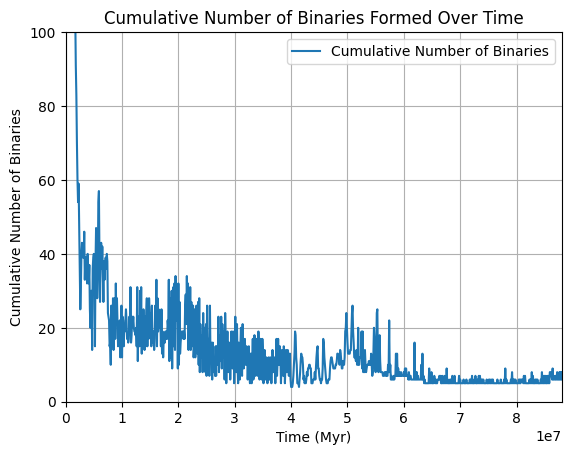

In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nbd_utils_code import nbd_read   


snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir'


snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])


times = []
binary_counts = []


def calculate_distance(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

def identify_binaries(x, y, z, vx, vy, vz, m, G=4.4969032492703040E-015):
    binaries = []
    for i in range(len(m)):
        for j in range(i+1, len(m)):
            r_ij = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)
            v_ij = np.sqrt((vx[i] - vx[j])**2 + (vy[i] - vy[j])**2 + (vz[i] - vz[j])**2)
            mu = m[i] * m[j] / (m[i] + m[j])
            E_bind = 0.5 * mu * v_ij**2 - G * m[i] * m[j] / r_ij
            if E_bind < 0:
                binaries.append((i, j))
    return len(binaries)


previous_binary_count = 0
for snapshot_file in snapshot_files:
    filepath = os.path.join(snapshot_directory, snapshot_file)
    data = nbd_read(filepath)
    
    times.append(data.time)
    x, y, z = data.x, data.y, data.z
    vx, vy, vz = data.vx, data.vy, data.vz
    m = data.mass

    current_binary_count = identify_binaries(x, y, z, vx, vy, vz, m)
    binaries_formed = current_binary_count - previous_binary_count
    binary_counts.append(binaries_formed)
    previous_binary_count = current_binary_count

    print(f"Time: {data.time:.2f} Myr, Total Binaries: {current_binary_count}, Binaries Formed Since Last Snapshot: {binaries_formed}")

cumulative_binaries = np.cumsum(binary_counts)

plt.figure()
plt.plot(times, cumulative_binaries, label="Cumulative Number of Binaries")
plt.ylim(0,100)
plt.xlim(0, 0.88e8)
plt.xlabel("Time (Myr)")
plt.ylabel("Cumulative Number of Binaries")
plt.title("Cumulative Number of Binaries Formed Over Time")
plt.legend()
plt.grid(True)
plt.show()


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir\cluster0000
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 200000.00 Myr, Total Binaries: 2, Binaries Formed Since Last Snapshot: 2
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir\cluster0001
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 400000.00 Myr, Total Binaries: 4, Binaries Formed Since Last Snapshot: 2
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir\cluster0002
N =  70
time 600000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 600000.00 Myr, Total Binaries: 6, Binaries Formed Since Last Snapshot: 2
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir\cluster0003
N =  70
time 800000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 800000.00 Myr, Total Binaries: 8, Binaries Fo

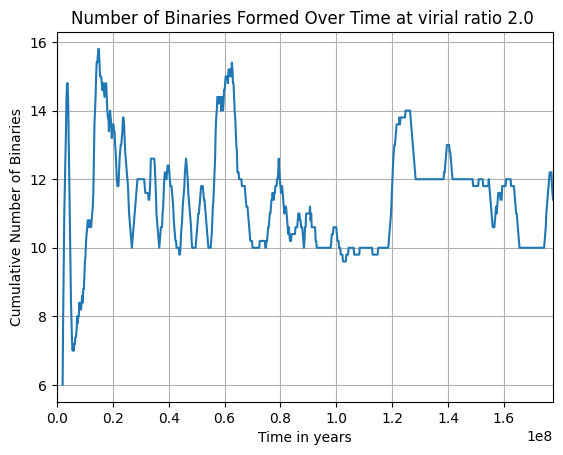

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nbd_utils_code import nbd_read

snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir'

snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

times = []
binary_counts = []

def identify_binaries(x, y, z, vx, vy, vz, m, G=4.4969032492703040E-015):
    binaries = []
    num_stars = len(m)

    # Create an array to hold the binding energy for each star with respect to others
    binding_energies = np.zeros((num_stars, num_stars))

    # Calculate binding energies between all pairs
    for i in range(num_stars):
        for j in range(i + 1, num_stars):
            r_ij = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)
            v_ij = np.sqrt((vx[i] - vx[j])**2 + (vy[i] - vy[j])**2 + (vz[i] - vz[j])**2)
            mu = m[i] * m[j] / (m[i] + m[j])
            E_bind = 0.5 * mu * v_ij**2 - G * m[i] * m[j] / r_ij
            
            binding_energies[i, j] = E_bind
            binding_energies[j, i] = E_bind  # Symmetric assignment

    # Identify mutually most bound pairs
    for i in range(num_stars):
        # Find the index of the star that has the minimum binding energy with respect to star i
        min_idx = np.argmin(binding_energies[i])
        if min_idx != i:  # Ensure it is not itself
            # Check if the minimum binding energy for the other star is this star
            if np.argmin(binding_energies[min_idx]) == i:
                # If so, we have found a mutually bound pair
                binaries.append((i, min_idx))

    return len(binaries)


previous_binary_count = 0
for snapshot_file in snapshot_files:
    filepath = os.path.join(snapshot_directory, snapshot_file)
    data = nbd_read(filepath)

    times.append(data.time)
    x, y, z = data.x, data.y, data.z
    vx, vy, vz = data.vx, data.vy, data.vz
    m = data.mass

    current_binary_count = identify_binaries(x, y, z, vx, vy, vz, m)
    binaries_formed = current_binary_count - previous_binary_count
    binary_counts.append(binaries_formed)
    previous_binary_count = current_binary_count

    print(f"Time: {data.time:.2f} Myr, Total Binaries: {current_binary_count}, Binaries Formed Since Last Snapshot: {binaries_formed}")

cumulative_binaries = np.cumsum(binary_counts)

# Apply a moving average to smooth the data
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

window_size = 10  # Adjust this for more or less smoothing
smoothed_binaries = moving_average(cumulative_binaries, window_size)

# Adjust times for the smoothed data
smoothed_times = times[window_size-1:]  # Align the times with the smoothed data

plt.figure()
plt.plot(smoothed_times, smoothed_binaries, label="Smoothed Cumulative Number of Binaries")
# plt.ylim(0, 100)
plt.xlim(0, 1.776e8)
plt.xlabel("Time in years")
plt.ylabel("Cumulative Number of Binaries")
plt.title("Number of Binaries Formed Over Time at virial ratio 2.0 ")
# plt.legend()
plt.grid(True)
plt.show()


In [68]:
import os
import numpy as np
import plotly.graph_objects as go
from nbd_utils_code import nbd_read

snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir'

snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

times = []
binary_counts = []

def identify_binaries(x, y, z, vx, vy, vz, m, G=4.4969032492703040E-015):
    binaries = []
    for i in range(len(m)):
        for j in range(i+1, len(m)):
            r_ij = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)
            v_ij = np.sqrt((vx[i] - vx[j])**2 + (vy[i] - vy[j])**2 + (vz[i] - vz[j])**2)
            mu = m[i] * m[j] / (m[i] + m[j])
            E_bind = 0.5 * mu * v_ij**2 - G * m[i] * m[j] / r_ij
            if E_bind < 0:
                binaries.append((i, j))
    return len(binaries)

previous_binary_count = 0
for snapshot_file in snapshot_files:
    filepath = os.path.join(snapshot_directory, snapshot_file)
    data = nbd_read(filepath)

    times.append(data.time)
    x, y, z = data.x, data.y, data.z
    vx, vy, vz = data.vx, data.vy, data.vz
    m = data.mass

    current_binary_count = identify_binaries(x, y, z, vx, vy, vz, m)
    binaries_formed = current_binary_count - previous_binary_count
    binary_counts.append(binaries_formed)
    previous_binary_count = current_binary_count

    print(f"Time: {data.time:.2f} Myr, Total Binaries: {current_binary_count}, Binaries Formed Since Last Snapshot: {binaries_formed}")

cumulative_binaries = np.cumsum(binary_counts)

# Apply a moving average to smooth the data
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

window_size = 3  # Adjust this for more or less smoothing
smoothed_binaries = moving_average(cumulative_binaries, window_size)

# Adjust times for the smoothed data
smoothed_times = times[window_size-1:]

# Create a Plotly figure
fig = go.Figure()

# Add the smoothed line plot
fig.add_trace(go.Scatter(
    x=smoothed_times, 
    y=smoothed_binaries, 
    mode='lines', 
    name='Smoothed Cumulative Binaries',
    line=dict(color='blue')
))

# Update layout for titles and labels
fig.update_layout(
    title="Cumulative Number of Binaries Formed Over Time (Smoothed)",
    xaxis_title="Time (Myr)",
    yaxis_title="Cumulative Number of Binaries",
    xaxis=dict(range=[0, 0.88e8]),  # Set x-axis limits
    yaxis=dict(range=[0, 100]),     # Set y-axis limits
    showlegend=True
)

# Show grid and plot
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

# Show the figure
fig.show()


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0000
N =  70
time 100000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 100000.00 Myr, Total Binaries: 1935, Binaries Formed Since Last Snapshot: 1935
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0001
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 200000.00 Myr, Total Binaries: 1470, Binaries Formed Since Last Snapshot: -465
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0002
N =  70
time 300000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 300000.00 Myr, Total Binaries: 943, Binaries Formed Since Last Snapshot: -527
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0003
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Time: 400000.00 Myr, Total Binaries: 7

Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir\cluster0060
N =  70
time 6100000.0
units 1.98847e+33 3.085677581e+18 31556952.0


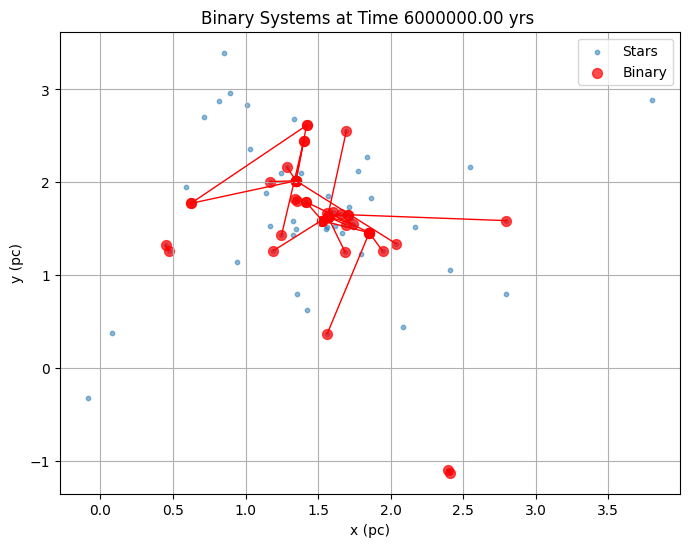

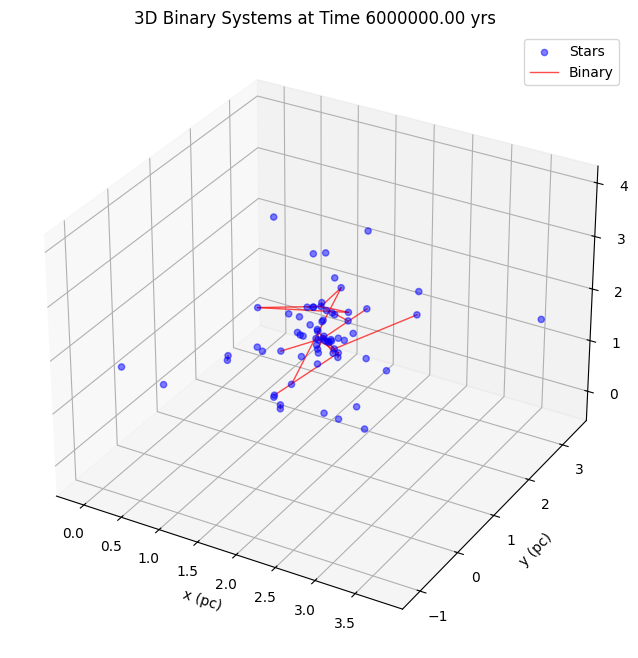

In [82]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from nbd_utils_code import nbd_read

# Function to calculate the snapshot index based on the desired time
def get_snapshot_index_from_time(desired_time, total_evolution_time, time_between_snapshots):
    total_snapshots = int(total_evolution_time / time_between_snapshots)
    snapshot_index = int(desired_time / time_between_snapshots)
    return min(snapshot_index, total_snapshots - 1)  # Ensure the index is within range

def calculate_distance(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

def identify_binaries(x, y, z, vx, vy, vz, m, G=4.4969032492703040E-015):
    binaries = []
    for i in range(len(m)):
        for j in range(i+1, len(m)):
            r_ij = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)
            v_ij = np.sqrt((vx[i] - vx[j])**2 + (vy[i] - vy[j])**2 + (vz[i] - vz[j])**2)
            mu = m[i] * m[j] / (m[i] + m[j])
            E_bind = 0.5 * mu * v_ij**2 - G * m[i] * m[j] / r_ij
            if E_bind < 0:
                binaries.append((i, j))
    return binaries

def plot_binaries_at_snapshot(x, y, z, binaries, time, snapshot_file):
    # 2D Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, s=10, label="Stars", alpha=0.5)
    
    for (i, j) in binaries:
        plt.plot([x[i], x[j]], [y[i], y[j]], 'r-', lw=1)
        plt.scatter([x[i], x[j]], [y[i], y[j]], s=50, c='red', label="Binary" if i == 0 else "", alpha=0.7)

    plt.title(f"Binary Systems at Time {time:.2f} yrs ")
    plt.xlabel("x (pc)")
    plt.ylabel("y (pc)")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.show()

    # 3D Plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='blue', s=20, alpha=0.5, label='Stars')

    for (i, j) in binaries:
        ax.plot([x[i], x[j]], [y[i], y[j]], [z[i], z[j]], 'r-', lw=1, label="Binary" if i == 0 else "", alpha=0.7)

    ax.set_title(f"3D Binary Systems at Time {time:.2f} yrs ")
    ax.set_xlabel("x (pc)")
    ax.set_ylabel("y (pc)")
    ax.set_zlabel("z (pc)")
    ax.legend()
    plt.show()

def plot_cluster(snapshot_directory, desired_time, total_evolution_time, time_between_snapshots):
    # Get sorted list of snapshot files
    snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

    # Get snapshot index based on time
    snapshot_index = get_snapshot_index_from_time(desired_time, total_evolution_time, time_between_snapshots)

    # Load the data from the specified snapshot
    snapshot_file = snapshot_files[snapshot_index]
    filepath = os.path.join(snapshot_directory, snapshot_file)
    data = nbd_read(filepath)

    # Extract positions, velocities, and masses
    x, y, z = data.x, data.y, data.z
    vx, vy, vz = data.vx, data.vy, data.vz
    m = data.mass

    # Identify binaries in the snapshot
    binaries = identify_binaries(x, y, z, vx, vy, vz, m)
    
    # Plot binaries at the desired time snapshot
    plot_binaries_at_snapshot(x, y, z, binaries, desired_time, snapshot_file)

# Example Usage
snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_24M_88Mev_0.5vir'
total_evolution_time = 88.4e6 # Total evolution time in years
time_between_snapshots = 0.1e6  # Time between snapshots in years
desired_time = 6e6  # Desired time to plot in years

plot_cluster(snapshot_directory, desired_time, total_evolution_time, time_between_snapshots)


In [11]:
import os
import numpy as np
import plotly.express as px
from nbd_utils_code import nbd_read  


snapshot_directory = r'C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir'
snapshot_files = sorted([f for f in os.listdir(snapshot_directory) if f.startswith('cluster')])

times = []
binary_counts = []
binary_positions = []

def identify_binaries(x, y, z, vx, vy, vz, m, G=4.4969032492703040E-015):
    binaries = []
    for i in range(len(m)):
        for j in range(i+1, len(m)):
            r_ij = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)
            v_ij = np.sqrt((vx[i] - vx[j])**2 + (vy[i] - vy[j])**2 + (vz[i] - vz[j])**2)
            mu = m[i] * m[j] / (m[i] + m[j])
            E_bind = 0.5 * mu * v_ij**2 - G * m[i] * m[j] / r_ij
            if E_bind < 0:
                binaries.append((i, j))
    return binaries

previous_binary_count = 0
for snapshot_file in snapshot_files:
    filepath = os.path.join(snapshot_directory, snapshot_file)
    data = nbd_read(filepath)
    
    times.append(data.time)
    x, y, z = data.x, data.y, data.z
    vx, vy, vz = data.vx, data.vy, data.vz
    m = data.mass

    binaries = identify_binaries(x, y, z, vx, vy, vz, m)
    current_binary_count = len(binaries)
    binaries_formed = current_binary_count - previous_binary_count
    binary_counts.append(binaries_formed)
    previous_binary_count = current_binary_count

# Prepare data for Plotly
binary_data = {'Time': times, 'Binaries Formed': binary_counts}

# Create a Box Plot with Plotly and set y-limit
fig_box = px.box(binary_data, x='Time', y='Binaries Formed',
                 title="Distribution of Binaries Formed at Each Snapshot",
                 labels={"Time": "Time (Myr)", "Binaries Formed": "Number of Binaries Formed"},
                 template="plotly_dark")
fig_box.update_yaxes(range=[-50, 50])  # Set y-limit from -100 to 100
fig_box.show()

# Create a Violin Plot with Plotly and set y-limit
fig_violin = px.violin(binary_data, x='Time', y='Binaries Formed', 
                       title="Distribution of Binaries Formed at Each Snapshot (Violin Plot)",
                       labels={"Time": "Time (Myr)", "Binaries Formed": "Number of Binaries Formed"},
                       box=True,  # This adds a box plot inside the violin
                       points="all",  # Shows all points
                       template="plotly_dark")
fig_violin.update_yaxes(range=[-50, 50])  # Set y-limit from -100 to 100
fig_violin.show()

# Create a Bar Plot with Plotly and set y-limit
fig_bar = px.bar(binary_data, x='Time', y='Binaries Formed',
                 title="Binaries Formed per Snapshot Over Time",
                 labels={"Time": "Time (Myr)", "Binaries Formed": "Number of Binaries Formed"},
                 template="plotly_dark")
fig_bar.update_yaxes(range=[-50, 50])  # Set y-limit from -100 to 100
fig_bar.show()


Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir\cluster0000
N =  70
time 200000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir\cluster0001
N =  70
time 400000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir\cluster0002
N =  70
time 600000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir\cluster0003
N =  70
time 800000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir\cluster0004
N =  70
time 1000000.0
units 1.98847e+33 3.085677581e+18 31556952.0
Opening NBD snapshot  C:\Users\shyam\Desktop\dissertation\results\RAD_0.5\output_23M_177Mev_2.0vir\cluster000